# **Dimensionality Reduction**

En `video-features.ipynb` se pudo extraer las caracteristicas de los videos del dataset `test_subset_10.csv`, `train_subset_10.csv` y `val_subset_10.csv`, de manera que, cada vector característico se almacenó en un archivo `${youtube_id}.npy`(dentro de la carpeta 'extraction')

## **Load packages**

In [59]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pathlib import Path
import os

## **Load datasets**

In [29]:
train_path = "./data/train_subset_10.csv"
val_path = "./data/val_subset_10.csv"
test_path = "./data/test_subset_10.csv"

train_df = pd.read_csv(train_path)
val_df = pd.read_csv(val_path)
test_df = pd.read_csv(test_path)

## **Useful functions**

In [48]:
def get_X_y_id(path: str, df:pd.DataFrame, is_train:bool=True):

    """
    Description:
        This function returns the feature_vectors, labels an ids of the videos

    Args: 
        path (str): the path to the directory where the videos are located
        df (pd.DataFrame): a DataFrame of Pandas, could be train_df, val_df or test_df
        is_train (bool): if True, the function returns the feature_vectors, labels an ids of the videos

    """

    feature_vectors = []
    labels = []
    ids = []

    for video in Path(path).glob('*.npy'):
        
        id = os.path.basename(video).split('_')[0]

        if id not in df['youtube_id'].values:
            continue

        current_video = np.load(video)

        if len(current_video.shape) <= 1:
            continue
        
        feature_vectors.append(np.mean(current_video, axis = 0)) # CHECK
        ids.append(id)

        if is_train:
            labels.append(df[df['youtube_id'] == id]['label'].values[0])

    feature_vectors = pd.DataFrame(np.vstack(feature_vectors))
    ids = pd.DataFrame({'youtube_id': ids})
    
    if is_train:
        labels = pd.DataFrame(np.vstack(labels))
        return feature_vectors, labels, ids
    else:
        return feature_vectors, ids


In [49]:
path_train = './extraction/train/r21d/r2plus1d_18_16_kinetics'
path_val = './extraction/val/r21d/r2plus1d_18_16_kinetics'
path_test = './extraction/test/r21d/r2plus1d_18_16_kinetics'


In [52]:
X_train, y_train, ids_train = get_X_y_id(path_train, train_df)
X_val, y_val, ids_val = get_X_y_id(path_val, val_df)
X_test, ids_test = get_X_y_id(path_test, test_df, False)

In [27]:
X_val.head()

,0,1,2,3,4,5,6,7,8,9,...,502,503,504,505,506,507,508,509,510,511
0,0.983179,0.327599,0.782543,1.001214,1.577275,0.340752,1.618470,1.223442,0.823669,0.681321,...,0.737517,0.705552,1.096622,0.711036,0.974399,0.668527,0.925978,0.582594,1.312039,2.023441
1,1.061987,0.605783,0.573484,0.550123,1.083703,0.436514,0.986723,0.237259,0.870769,0.636464,...,0.710814,1.498515,0.875496,1.125336,2.201024,1.377259,1.261040,0.406046,0.522262,0.986933
2,2.448404,1.147437,1.186966,0.792676,0.788874,0.292240,0.791563,0.512280,0.616745,0.588685,...,1.055853,1.433681,2.381611,0.469194,0.610362,2.227937,1.419250,0.234973,0.533393,0.299416
3,0.312113,0.368528,0.241799,0.789037,0.732306,0.635243,1.188323,0.714574,1.577718,1.490716,...,1.056502,0.055957,1.616206,1.442354,0.660173,0.921523,0.043679,0.595073,1.019820,0.219829
4,0.232415,0.736968,0.989492,0.516418,0.407583,0.240481,0.723166,1.121362,0.571783,0.914052,...,0.694645,0.176282,0.564752,1.375056,0.592111,0.756491,0.426875,0.457333,1.180734,0.757165


In [23]:
y_val.head()

,0
0,flipping pancake
1,wrapping present
2,stretching leg
3,stretching leg
4,shot put


In [24]:
ids_val.head()


,youtube_id
0,--33Lscn6sk
1,-0WZKTu0xNk
2,-2VKVjgNuE0
3,-2VXhGGeOWg
4,-2zDnjMmI5U


De esta manera, la fila 0 de X, y, id se corresponden, lo mismo para la fila 1, 2, ...

In [58]:
print(f"Shape de la matriz de training: {X_train.shape}")
print(f"Size de los labels de training: {y_train.shape}")
print(f"Size de los ids de training: {ids_train.shape}\n")

print(f"Shape de la matriz de validation: {X_val.shape}")
print(f"Size de los labels de validation: {y_val.shape}")
print(f"Size de los ids de validation: {ids_val.shape}\n")

print(f"Shape de la matriz de testing: {X_test.shape}")
print(f"Size de los ids de testing: {ids_test.shape}")


Shape de la matriz de training: (5414, 512)
Size de los labels de training: (5414, 1)
Size de los ids de training: (5414, 1)

Shape de la matriz de validation: (426, 512)
Size de los labels de validation: (426, 1)
Size de los ids de validation: (426, 1)

Shape de la matriz de testing: (805, 512)
Size de los ids de testing: (805, 1)


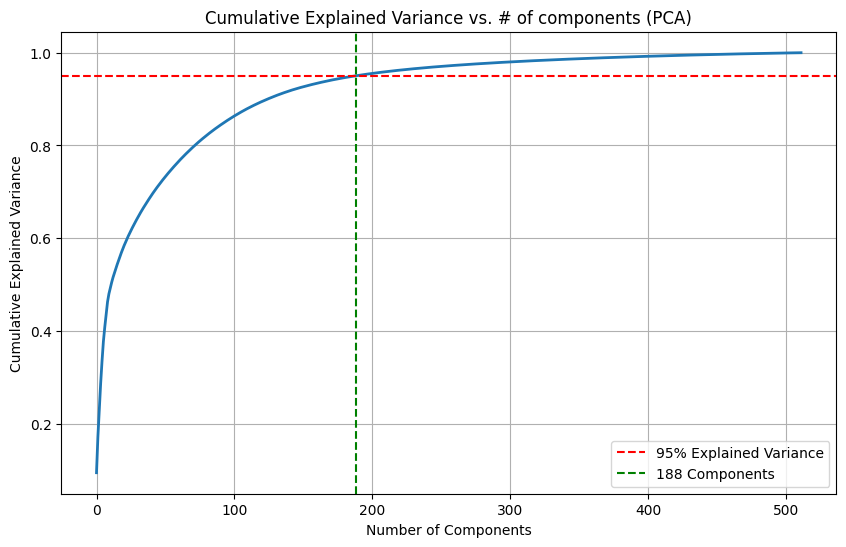

N_componentes:  188


In [60]:
from sklearn.decomposition import PCA

pca = PCA()
X_train_pca = pca.fit_transform(X_train)
cumsum = np.cumsum(pca.explained_variance_ratio_)
k_pca = np.argmax(cumsum >= 0.95)

plt.figure(figsize=(10, 6))
plt.plot(cumsum, linewidth=2)
plt.axhline(y=0.95, color='r', linestyle='--', label='95% Explained Variance')
plt.axvline(x=k_pca, color='g', linestyle='--', label=f'{k_pca} Components')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Cumulative Explained Variance vs. # of components (PCA)')
plt.legend()
plt.grid(True)
plt.show()

print("N_componentes: ",k_pca)

ValueError: 'c' argument must be a color, a sequence of colors, or a sequence of numbers, not 0        balloon blowing
1        balloon blowing
2         baking cookies
3         baking cookies
4        balloon blowing
              ...       
5409    wrapping present
5410      baking cookies
5411    wrapping present
5412          dying hair
5413      baking cookies
Name: 0, Length: 5414, dtype: object

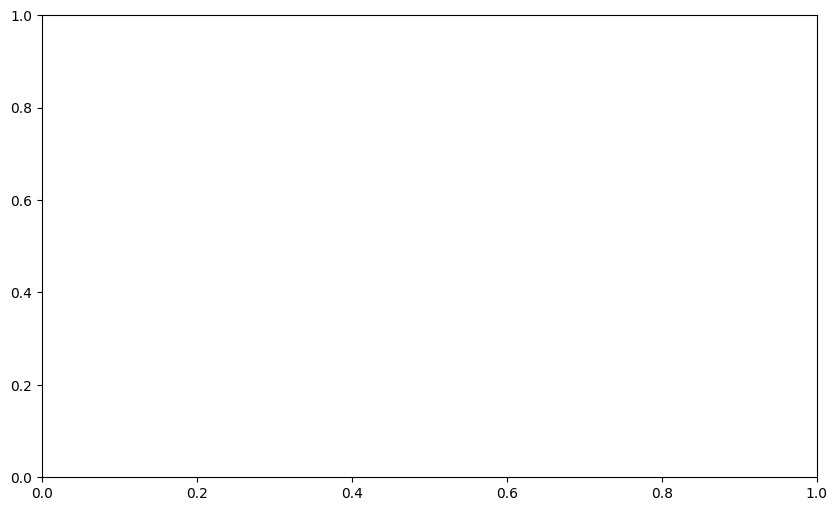

In [61]:
from sklearn.manifold import TSNE

# Apply t-SNE
tsne = TSNE(n_components=2, random_state=42)
X_train_tsne = tsne.fit_transform(X_train)

# Plot the t-SNE result
plt.figure(figsize=(10, 6))
plt.scatter(X_train_tsne[:, 0], X_train_tsne[:, 1], c=y_train[0], cmap='viridis', s=5)
plt.colorbar()
plt.title('t-SNE visualization of training data')
plt.xlabel('t-SNE component 1')
plt.ylabel('t-SNE component 2')
plt.show()

In [64]:
pip install umap

  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'done'
  Preparing metadata (pyproject.toml): started
  Preparing metadata (pyproject.toml): finished with status 'done'
  Created wheel for umap: filename=umap-0.1.1-py3-none-any.whl size=3586 sha256=2593c755d451f1c69d585e83302ba73696778a974d044bc0da168fab2b1d9ab6
  Stored in directory: c:\users\nayel\appdata\local\pip\cache\wheels\48\4a\1c\1d511cbb0413a448d8546e958f8e82b98d9bb493038d19ece2
Successfully built umap
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.2 -> 25.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [65]:
import umap

# Apply UMAP
umap_reducer = umap.UMAP(n_components=2, random_state=42)
X_train_umap = umap_reducer.fit_transform(X_train)

# Plot the UMAP result
plt.figure(figsize=(10, 6))
plt.scatter(X_train_umap[:, 0], X_train_umap[:, 1], c=y_train[0], cmap='viridis', s=5)
plt.colorbar()
plt.title('UMAP visualization of training data')
plt.xlabel('UMAP component 1')
plt.ylabel('UMAP component 2')
plt.show()

AttributeError: module 'umap' has no attribute 'UMAP'